<a href="https://colab.research.google.com/github/Chandrasekhar1919/chandra_hds5210/blob/main/week13/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'Screentime - Overall Usage.csv'
screentime_data = pd.read_csv(file_path)
# Strip whitespace from all column names
screentime_data.columns = screentime_data.columns.str.strip()

# Converting 'Date' to datetime format
screentime_data['Date'] = pd.to_datetime(screentime_data['Date'], format='%m/%d/%Y')

# 1. Basic Statistics
# Show rows and columns
num_rows, num_columns = screentime_data.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")
print(screentime_data.head())


Number of rows: 27, Number of columns: 4
        Date  Total Usage  Notifications  Unlocks
0 2022-08-26          236            600      102
1 2022-08-27          194            411       96
2 2022-08-28          301            709      114
3 2022-08-29          190            542      119
4 2022-08-30          204            583       85


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [ ]:
# Number of unique values in each column
unique_counts = screentime_data.nunique()
print("Unique values per column:\n", unique_counts)

# Column with the greatest number of unique values
most_diverse_column = unique_counts.idxmax()
print(f"Column with the most unique values: {most_diverse_column}")

Unique values per column:
 Date             27
Total Usage      27
Notifications    27
Unlocks          26
dtype: int64
Column with the most unique values: Date


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [ ]:
# Columns with all the same values
redundant_columns = [col for col in screentime_data.columns if screentime_data[col].nunique() == 1]
print(f"Columns with redundant values: {redundant_columns}")


Columns with redundant values: []


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

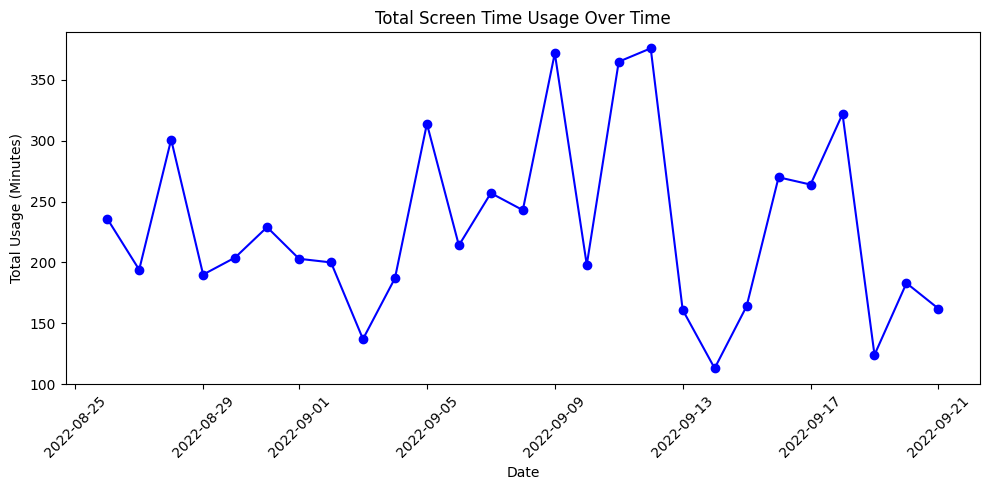

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(screentime_data['Date'], screentime_data['Total Usage'], marker='o', linestyle='-', color='b')
plt.title('Total Screen Time Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Total Usage (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

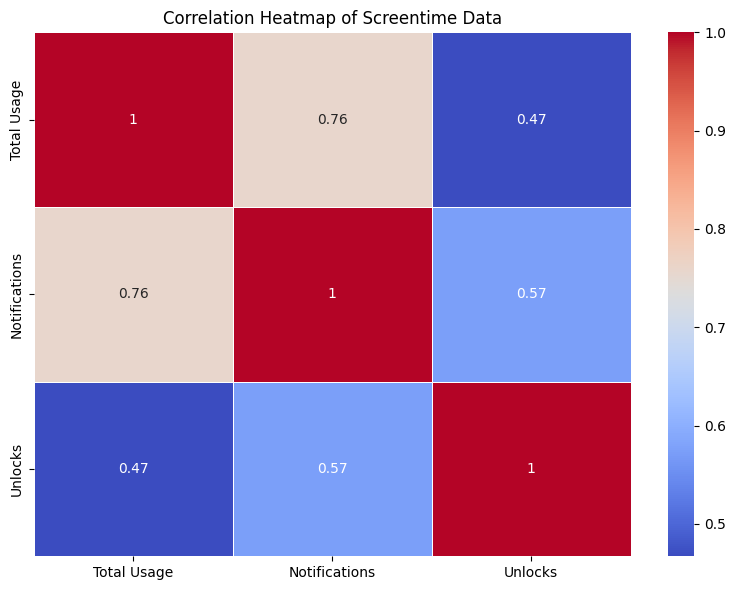

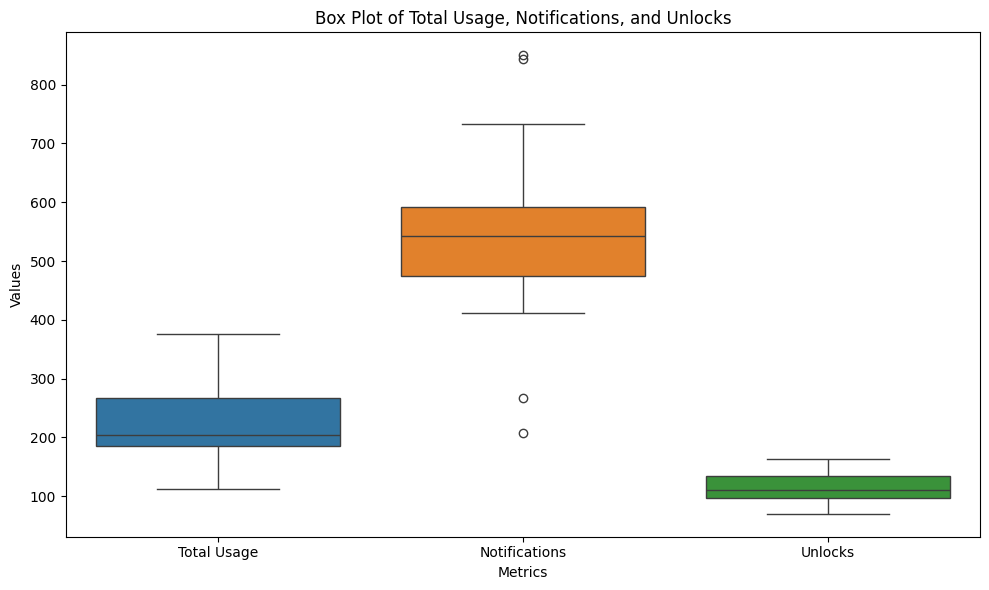

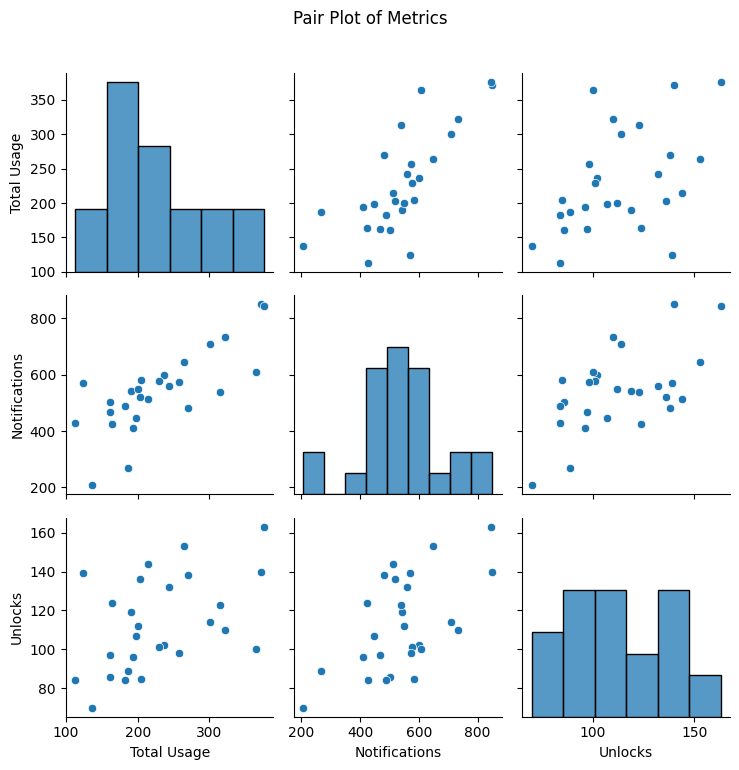

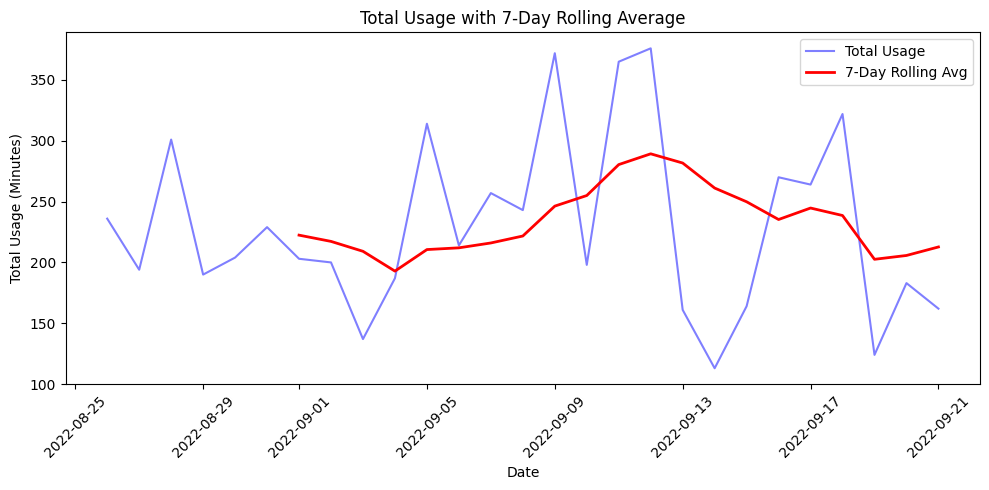

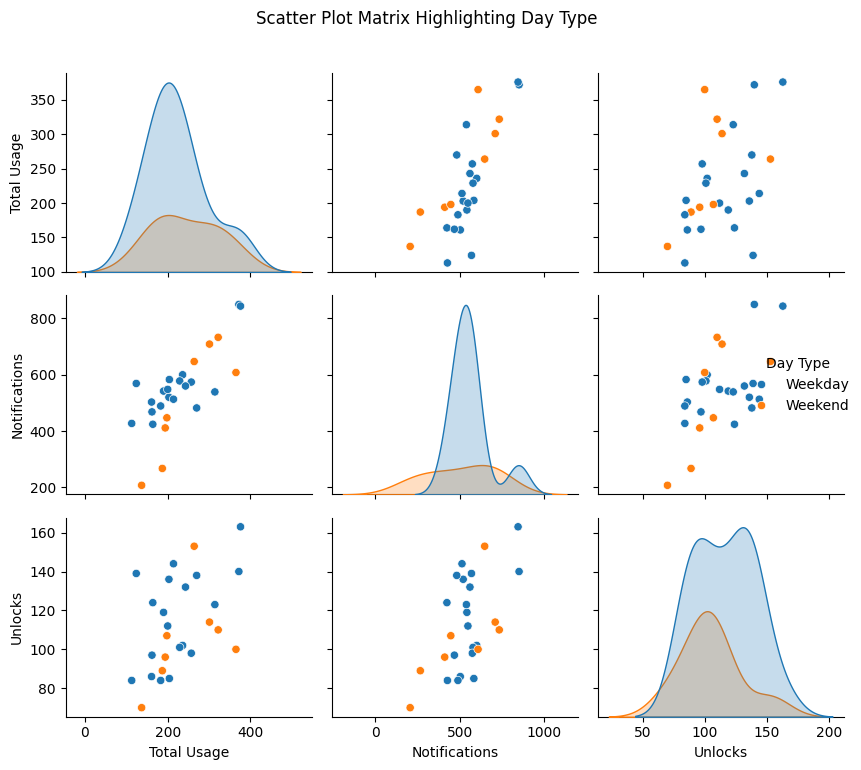

In [ ]:
# 5. Heatmap of Correlation Between Variables
plt.figure(figsize=(8, 6))
sns.heatmap(screentime_data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Screentime Data')
plt.tight_layout()
plt.show()

# 6. Box Plot for Distribution of Total Usage, Notifications, and Unlocks
plt.figure(figsize=(10, 6))
sns.boxplot(data=screentime_data[['Total Usage', 'Notifications', 'Unlocks']])
plt.title('Box Plot of Total Usage, Notifications, and Unlocks')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# 7. Pair Plot for Relationships between All Metrics
sns.pairplot(screentime_data[['Total Usage', 'Notifications', 'Unlocks']])
plt.suptitle('Pair Plot of Metrics', y=1.02)
plt.tight_layout()
plt.show()

# 8. Rolling Average of Total Usage to Identify Trends
screentime_data['7-Day Rolling Avg'] = screentime_data['Total Usage'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(screentime_data['Date'], screentime_data['Total Usage'], label='Total Usage', color='blue', alpha=0.5)
plt.plot(screentime_data['Date'], screentime_data['7-Day Rolling Avg'], label='7-Day Rolling Avg', color='red', linewidth=2)
plt.title('Total Usage with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Usage (Minutes)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Scatter Plot Matrix with Hue based on Day Type (Weekday vs Weekend)
# Adding a new column to determine if the date is a weekday or weekend
screentime_data['Day Type'] = np.where(screentime_data['Date'].dt.weekday < 5, 'Weekday', 'Weekend')

sns.pairplot(screentime_data, vars=['Total Usage', 'Notifications', 'Unlocks'], hue='Day Type')
plt.suptitle('Scatter Plot Matrix Highlighting Day Type', y=1.02)
plt.tight_layout()
plt.show()


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

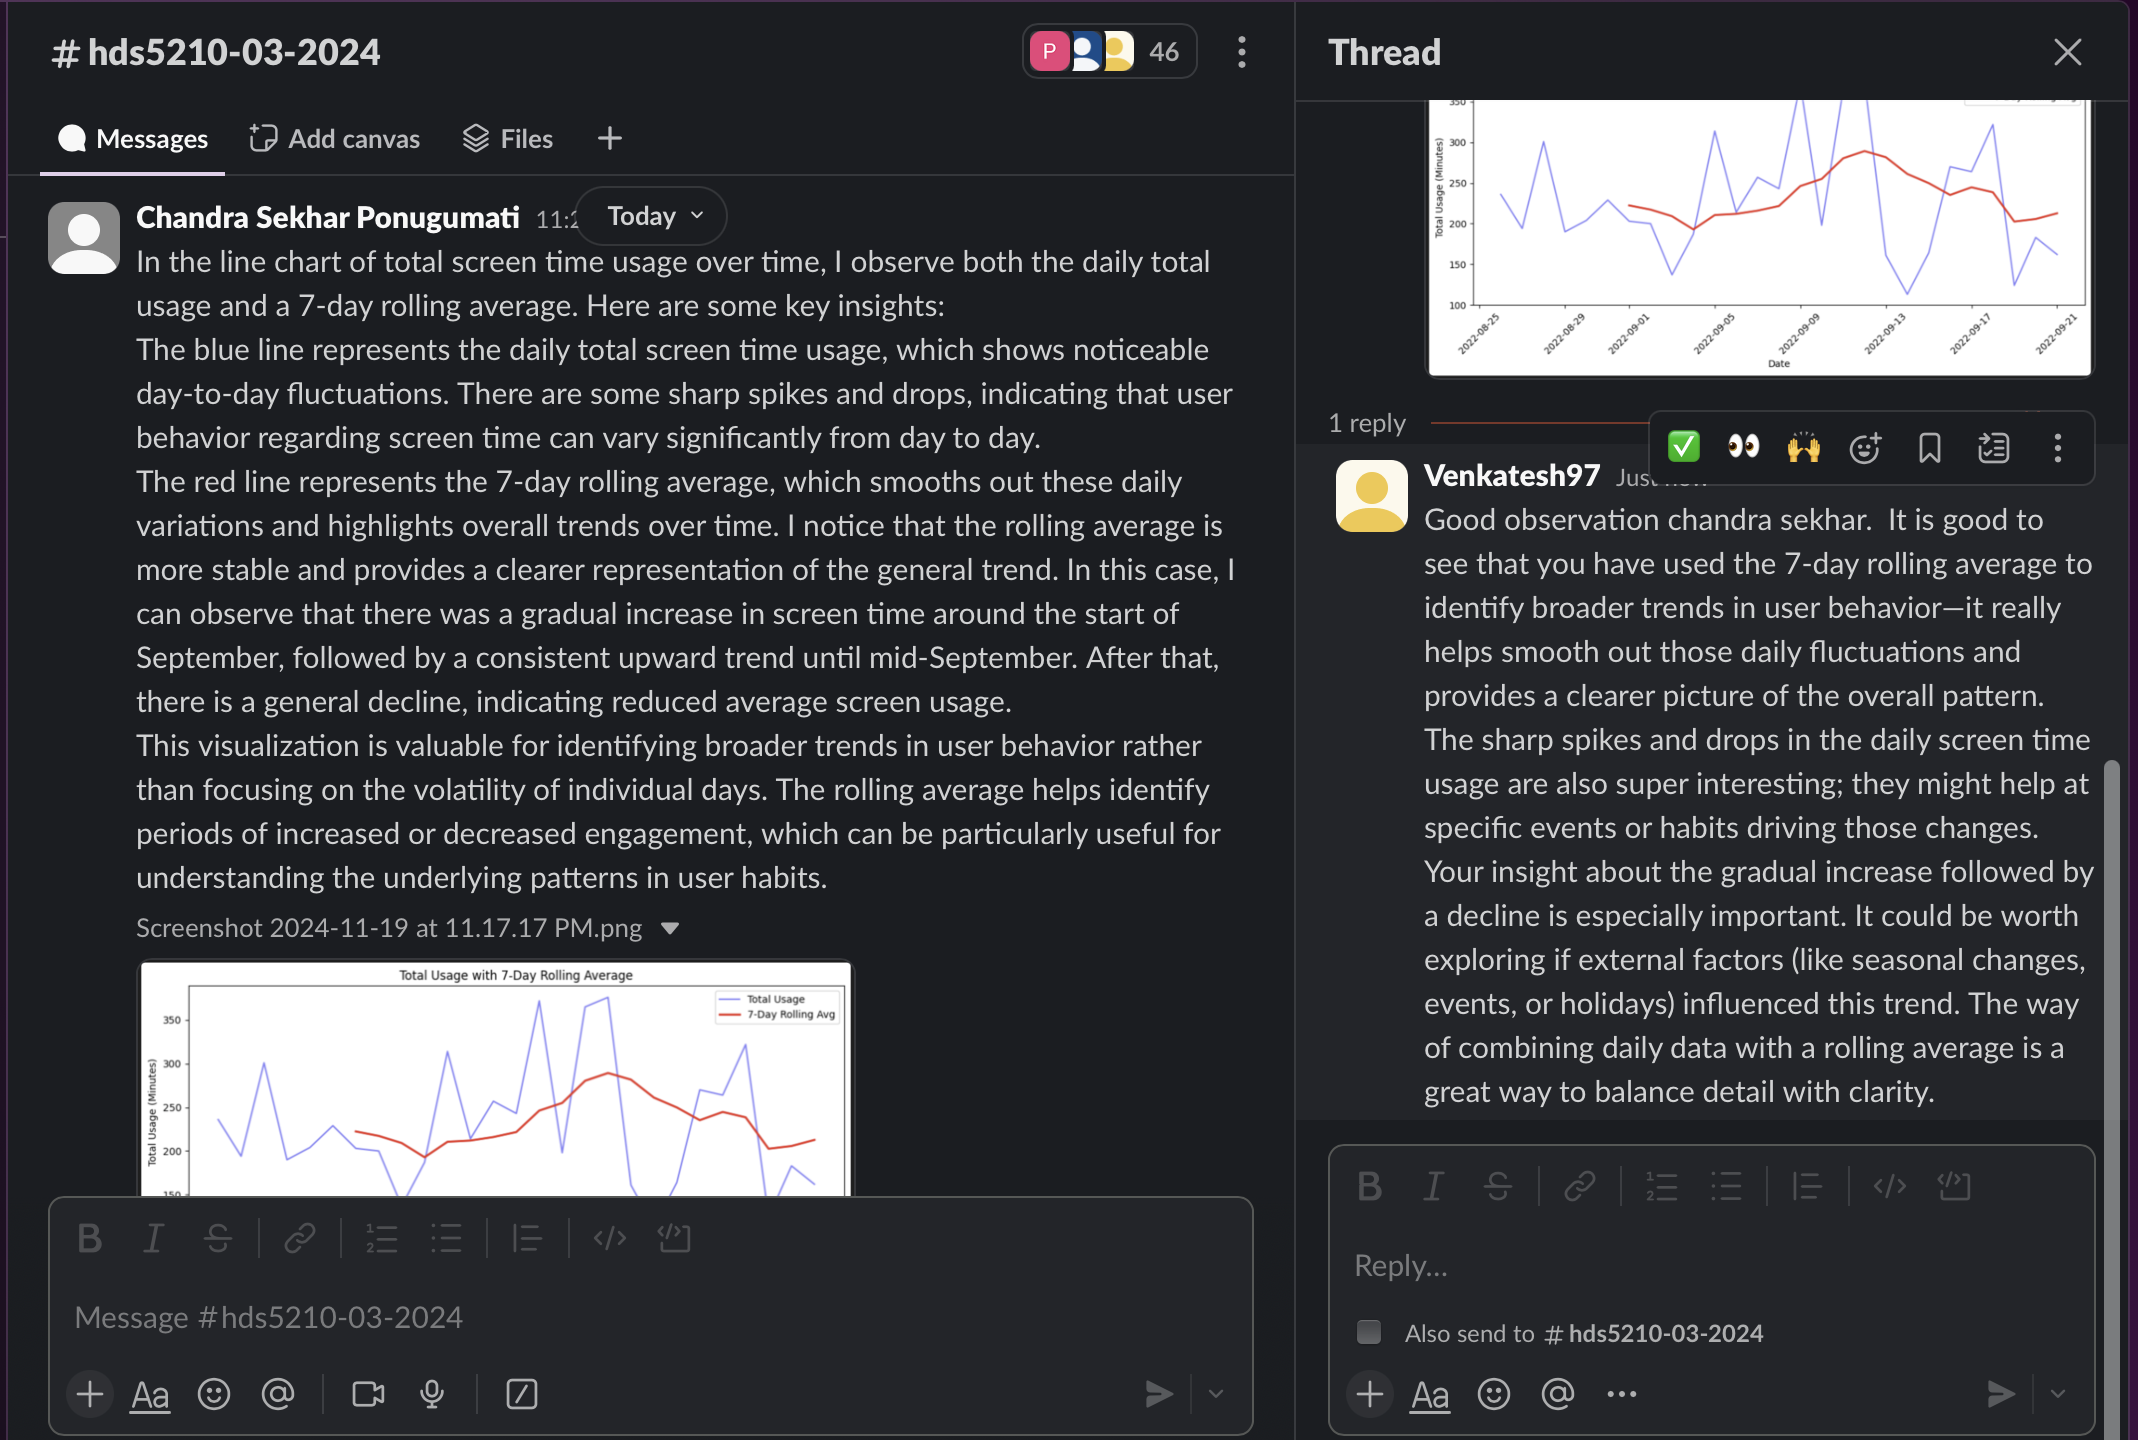

In [ ]:
from IPython.display import Image, display
display(Image(filename='image.png'))



---



## Submitting Your Work

Submit your work as usual.